In [61]:
import matplotlib.pyplot as plt

In [62]:
import numpy as np
from PIL import Image
# opening image
img = Image.open('1665_girl_with_a_pearl_earring_sm.jpg')
arr = np.array(img,dtype=np.uint8)

In [63]:
arr.shape

(474, 400, 3)

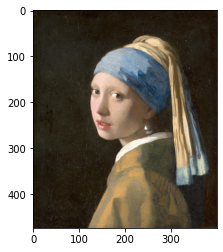

In [64]:
plt.imshow(arr)

# Converting rgb to grayscale

In [65]:
grayscale=np.ones((474,400),dtype=np.uint8)

In [66]:
# averaging rgb to achieve grayscale
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        tmp=(float(arr[i][j][0])+float(arr[i][j][1])+float(arr[i][j][2]))/3
        grayscale[i][j]=int(tmp)

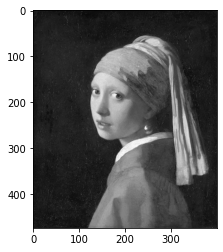

In [67]:
plt.imshow(grayscale,cmap="gray",vmin=0,vmax=255)

# floyd steinberg

In [68]:
import math

In [69]:
def find_closest_palette_color(pixel):
    return 255 * math.floor(pixel/128)

In [70]:
# like the pseudocode in slides
for i in range(1,grayscale.shape[0]-1):
    for j in range(1,grayscale.shape[1]-1):
        oldpixel=grayscale[i][j]
        newpixel=find_closest_palette_color(oldpixel)
        grayscale[i][j]=newpixel
        quant_error=oldpixel-newpixel
        grayscale[i+1][j]=grayscale[i+1][j]+7/16*quant_error
        grayscale[i-1][j+1]=grayscale[i-1][j+1]+3/16*quant_error
        grayscale[i][j+1]=grayscale[i][j+1]+5/16*quant_error
        grayscale[i+1][j+1]=grayscale[i+1][j+1]+1/16*quant_error

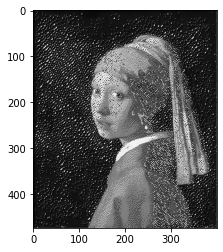

In [71]:
plt.imshow(grayscale,cmap="gray",vmin=0,vmax=255)